In [1]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram

In [2]:
# Création d'un circuit quantique à 2 qubits
circ = QuantumCircuit(2)

In [3]:
# Porte de Hadamard sur les quatres premiers qubits pour permettre à toutes les possibilités de cohabiter
circ.h(0)
circ.h(1)

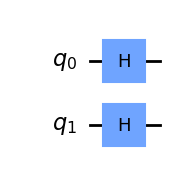

In [4]:
# Apercu du circuit
circ.draw('mpl')

In [5]:
# Inversion de la phase du premier qubit
circ.x(0)

In [6]:
# Porte de contrôle-Z entre les deux qubits
circ.cz(0,1)

In [7]:
# Inversion de la phase du premier qubit et ajout d'une barrière pour plus de clarté
circ.x(0)
circ.barrier()

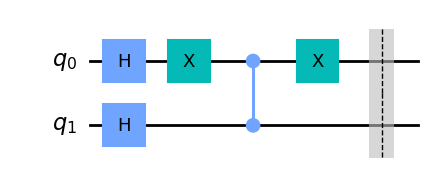

In [8]:
circ.draw('mpl')

In [9]:
# Porte de Hadamard sur les quatres premiers qubits (personnes)
circ.h(0)
circ.h(1)

In [10]:
# Inversion de la phase des deux qubits
circ.z(0)
circ.z(1)

In [11]:
# Porte de contrôle-Z entre les deux qubits
circ.cz(0,1)

In [12]:
# Porte de Hadamard sur les quatres premiers qubits
circ.h(0)
circ.h(1)

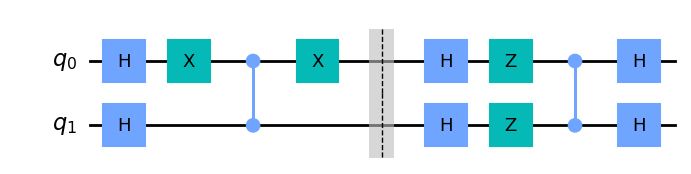

In [13]:
circ.draw('mpl')

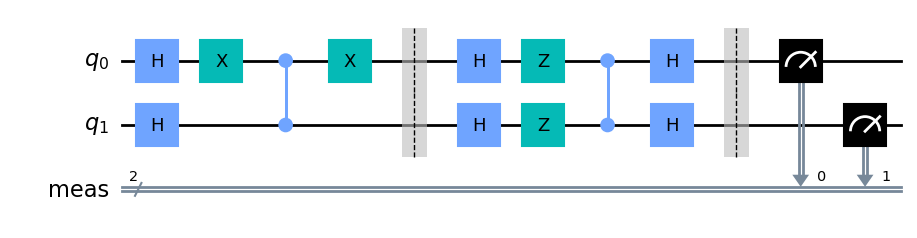

In [14]:
# Permet de mesurer tous les qubits du circuit
circ.measure_all()
circ.draw('mpl')

Statevector([ 0.+0.j, -0.+0.j,  1.-0.j,  0.+0.j],
            dims=(2, 2))


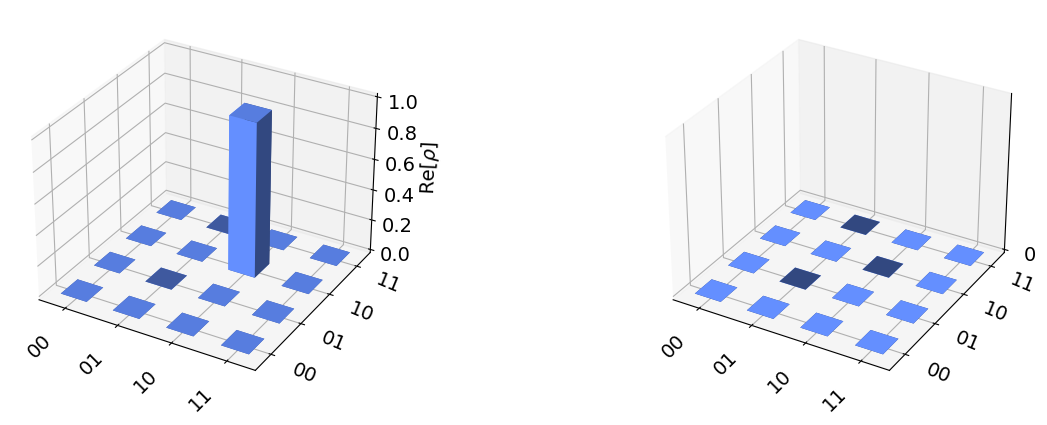

In [15]:
# Utilisation du backend 'statevector_simulator' de Qiskit pour simuler le circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)
# Représentation graphique de l'état final
plot_state_city(outputstate)

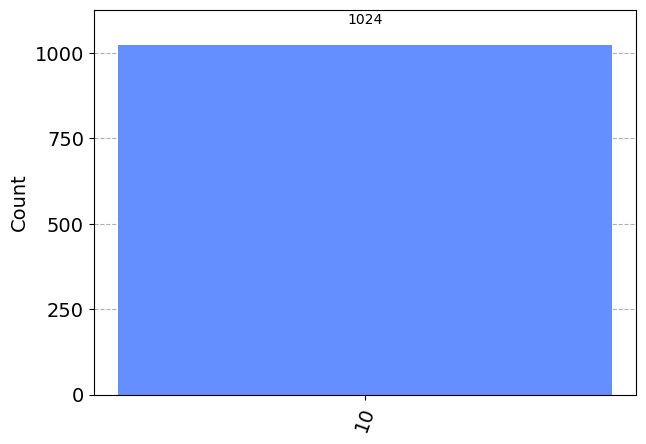

In [16]:
simulator = Aer.get_backend('aer_simulator')
job = execute(circ, backend=simulator, shots=1024)
result = simulator.run(transpile(circ,simulator)).result()
counts = result.get_counts(circ)
plot_histogram(counts)
# On observe qu'il y a 100% de chance d'obtenir ce résultat